In [12]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [20]:
%matplotlib inline

In [21]:
train_x = []
train_y = []

with open("./train_data.dat") as f:
    for line in f.readlines():
        line = re.split('\s', line)
        x, y = filter(lambda s: s != "", line)
        train_x.append(float(x))
        train_y.append(float(y))
        
train_x = np.array(train_x)
train_y = np.array(train_y)

In [22]:
test_x = []

with open("./test_data.dat") as f:
    for line in f.readlines():
        test_x.append(float(x))
        
test_x = np.array(test_x)

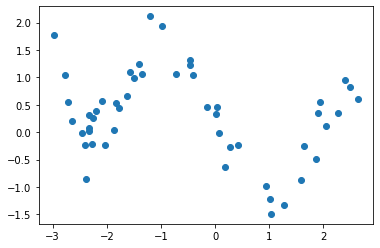

In [23]:
plt.scatter(train_x, train_y)
plt.show()

In [ ]:
phi = lambda x: np.array([x**0, x**1, x**2])
np.vectorize(phi, signature='(n)->(n,m)')